In [2]:
"""Voting Classifier"""
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

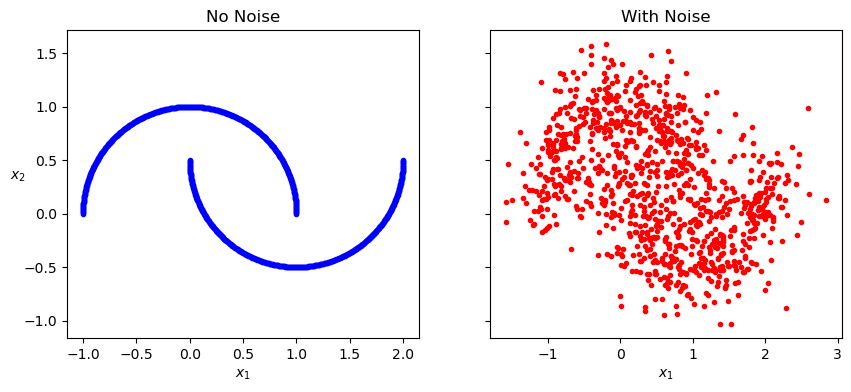

In [43]:
# Data
fig, ax = plt.subplots(ncols=2,sharey=True,
                      figsize=(10, 4))
def plot_data(style,noise):
    x, y = make_moons(n_samples=1000, noise=noise)
    plt.plot(x[:,0],x[:,1],style)
    plt.xlabel("$x_1$")

plt.sca(ax[0])
plt.title('No Noise')
plt.ylabel("$x_2$", rotation=0)
plot_data('.b',noise=0)
plt.sca(ax[1])
plt.title('With Noise')
plot_data('r.',noise=0.25)
plt.show()

In [45]:
# Split the data into a training set and a test set
x, y = make_moons(n_samples=1000, noise=0.25)
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [48]:
# Setting up a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr',LogisticRegression()),
    ('rf',RandomForestClassifier()),
    ('svc',SVC())
])
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [55]:
voting_clf.named_estimators_,voting_clf.estimators_

({'lr': LogisticRegression(), 'rf': RandomForestClassifier(), 'svc': SVC()},
 [LogisticRegression(), RandomForestClassifier(), SVC()])

In [59]:
for clf in voting_clf.estimators_:
    print(str(clf),'=', clf.score(x_test,y_test))

LogisticRegression() = 0.876
RandomForestClassifier() = 0.94
SVC() = 0.948


In [65]:
x_test.shape

(250, 2)

In [80]:
# Hard voting
voting_clf.predict(x_test[:6])
# It pick the vote of the majority as below

array([1, 1, 1, 1, 0, 1])

In [79]:
[clf.predict(x_test[:6]) for clf in voting_clf.estimators_]

[array([1, 0, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 0, 1])]

In [82]:
voting_clf.score(x_test,y_test)

0.944

In [83]:
# Trying soft voting now
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability=True
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [84]:
voting_clf.score(x_test,y_test)

0.932